In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

In [2]:
# Ruta del dataset
file_path = f'../data/processed'

# Cargar el dataset
X_train = pd.read_csv(f'{file_path}/X_train_processed.csv')
X_test = pd.read_csv(f'{file_path}/X_test_processed.csv')
y_train = pd.read_csv(f'{file_path}/y_train_processed.csv')
y_test = pd.read_csv(f'{file_path}/y_test_processed.csv')

In [3]:
# Inicializar un diccionario para los resultados
results = {}

In [4]:
# Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
results["Regresión Lineal"] = {'RMSE': rmse_lr, 'R²': r2_lr}

In [13]:
# Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)
results["Árbol de Decisión"] = {'RMSE': rmse_tree, 'R²': r2_tree}

In [15]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train['area'])
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
results["Random Forest"] = {'RMSE': rmse_rf, 'R²': r2_rf}

In [17]:
# SVM
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train['area'])
y_pred_svm = svm_model.predict(X_test)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
r2_svm = r2_score(y_test, y_pred_svm)
results["SVM"] = {'RMSE': rmse_svm, 'R²': r2_svm}

In [19]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train['area'])
y_pred_gb = gb_model.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)
results["Gradient Boosting"] = {'RMSE': rmse_gb, 'R²': r2_gb}

In [20]:
# Imprimir resultados
print("\nResultados de Evaluación:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  RMSE: {metrics['RMSE']}")
    print(f"  R²: {metrics['R²']}")
    print("\n")


Resultados de Evaluación:
Regresión Lineal:
  RMSE: 9.84078723379696e-16
  R²: 1.0


Árbol de Decisión:
  RMSE: 0.026695645819523644
  R²: 0.9991522810655828


Random Forest:
  RMSE: 0.010331916327147417
  R²: 0.9998730207432068


SVM:
  RMSE: 0.14358036238075814
  R²: 0.9754777051333983


Gradient Boosting:
  RMSE: 0.0073025996641503865
  R²: 0.9999365654292065




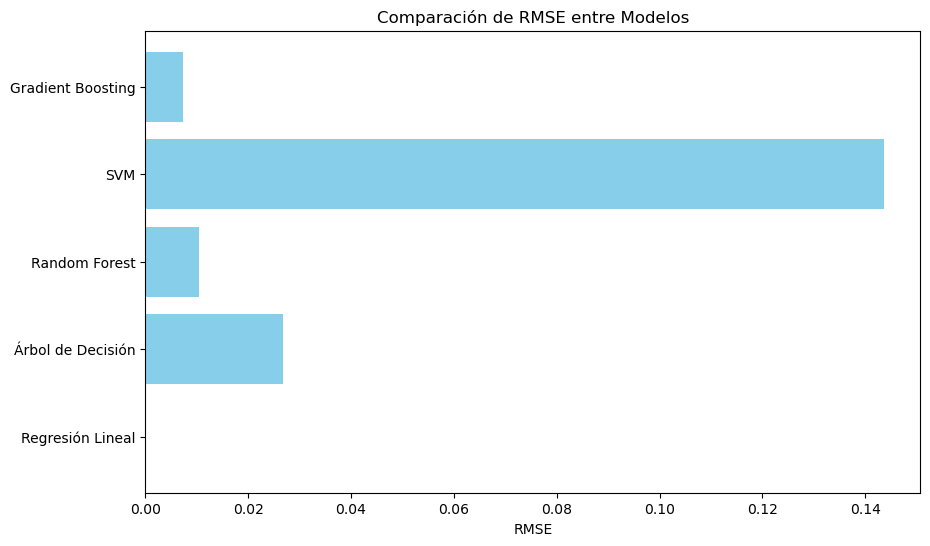

In [21]:
# Visualización de resultados
model_names = list(results.keys())
rmse_values = [metrics['RMSE'] for metrics in results.values()]
plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_values, color='skyblue')
plt.xlabel('RMSE')
plt.title('Comparación de RMSE entre Modelos')
plt.show()